In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
data_dir = "data/" # Define data path

In [2]:
df = pd.read_csv(data_dir + "food_crises_cleaned.csv") # Read data into DataFrame
df["date"] = pd.to_datetime(df["year_month"], format="%Y_%m") # Create date column
print(len(df['district'].unique()))
df.set_index(["date", "district"], inplace=True) # Set index

78


In [3]:
df

,,country,district_code,centx,centy,year_month,year,month,ipc,ha,ndvi_mean,...,et_mean,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct
date,district,,,,,,,,,,,,,,,,,,,,,
2007-01-01,Bor,South Sudan,74,32.00486,6.465644,2007_01,2007,1,NaN,NaN,0.345851,...,0.671249,0.048880,0,0,0.561363,14008.3300,7.961984,239344.0,11393.760,90.8503
2007-02-01,Bor,South Sudan,74,32.00486,6.465644,2007_02,2007,2,NaN,NaN,0.307600,...,0.129184,-0.457928,0,0,0.565693,14008.3300,7.961984,239344.0,11393.760,90.8503
2007-03-01,Bor,South Sudan,74,32.00486,6.465644,2007_03,2007,3,NaN,NaN,0.278344,...,1.025460,-0.590175,0,0,0.592437,14008.3300,7.961984,239344.0,11393.760,90.8503
2007-04-01,Bor,South Sudan,74,32.00486,6.465644,2007_04,2007,4,NaN,NaN,0.303320,...,3.846809,-1.845536,0,0,0.605352,14008.3300,7.961984,239344.0,11393.760,90.8503
2007-05-01,Bor,South Sudan,74,32.00486,6.465644,2007_05,2007,5,NaN,NaN,0.413716,...,8.316274,-2.972735,0,0,0.618699,14008.3300,7.961984,239344.0,11393.760,90.8503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,Malakal,South Sudan,151,31.64280,9.658457,2019_10,2019,10,3.0,0.0,0.681990,...,22.853360,6.053181,1,0,82.872570,757.7855,13.068690,102228.0,7145.909,85.5000
2019-11-01,Malakal,South Sudan,151,31.64280,9.658457,2019_11,2019,11,NaN,NaN,0.556748,...,13.372410,8.745254,0,0,87.728720,757.7855,13.068690,102228.0,7145.909,85.5000
2019-12-01,Malakal,South Sudan,151,31.64280,9.658457,2019_12,2019,12,NaN,NaN,0.400063,...,3.089540,1.698060,0,0,93.566750,757.7855,13.068690,102228.0,7145.909,85.5000


In [13]:
df.index.levels[1]

Index(['Abiemnhom', 'Akobo', 'Anzara', 'Aweil Center', 'Aweil East',
       'Aweil North', 'Aweil South', 'Aweil West', 'Awerial', 'Ayod', 'Baliet',
       'Bor', 'Budi', 'Cueibet', 'Duk', 'Ezo', 'Fangak', 'Fashoda',
       'Gogrial East', 'Gogrial West', 'Guit', 'Ibba', 'Ikotos', 'Juba',
       'Jur River', 'Kajo Keji', 'Kapoeta East', 'Kapoeta North',
       'Kapoeta South', 'Koch', 'Lafon', 'Lainya', 'Leer', 'Longchuk', 'Maban',
       'Magwi', 'Maiwut', 'Malakal', 'Manyo', 'Maridi', 'Mayendit', 'Mayom',
       'Melut', 'Morobo', 'Mundri East', 'Mundri West', 'Mvolo', 'Nagero',
       'Nasir', 'Nyirol', 'Panyijiar', 'Panyikang', 'Pariang', 'Pibor', 'Pigi',
       'Pochalla', 'Raja', 'Renk', 'Rubkona', 'Rumbek Center', 'Rumbek East',
       'Rumbek North', 'Tambura', 'Terekeka', 'Tonj East', 'Tonj North',
       'Tonj South', 'Torit', 'Twic', 'Twic East', 'Ulang', 'Uror', 'Wau',
       'Wulu', 'Yambio', 'Yei', 'Yirol East', 'Yirol West'],
      dtype='object', name='district')

In [4]:
mean_ipc_by_year = df.reset_index()[["date", "ipc"]].dropna().groupby("date").mean()

In [5]:
mean_ipc_by_year

,ipc
date,
2009-07-01,1.576923
2009-10-01,1.679487
2010-01-01,1.320513
2010-04-01,1.448718
2010-07-01,1.602564
2010-10-01,1.653846
2011-01-01,1.346154
2011-04-01,1.512821
2011-07-01,2.076923


<Axes: xlabel='date'>

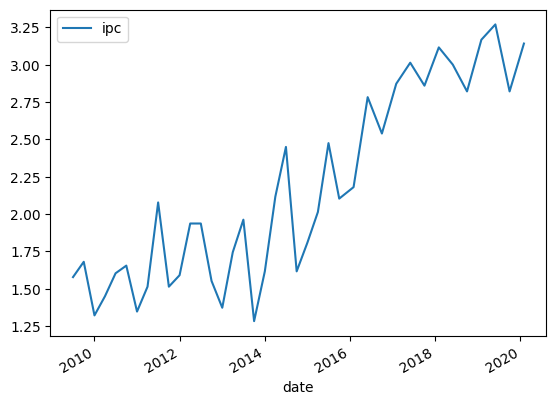

In [6]:
mean_ipc_by_year.plot()

ADF Statistic: 0.5806568927113567
p-value: 0.9871290228976419
Critical Values:
   1%: -3.6327426647230316
   5%: -2.9485102040816327
   10%: -2.6130173469387756
ADF Statistic: -7.315376917588824
p-value: 1.2332508042833173e-10
Critical Values:
   1%: -3.6327426647230316
   5%: -2.9485102040816327
   10%: -2.6130173469387756


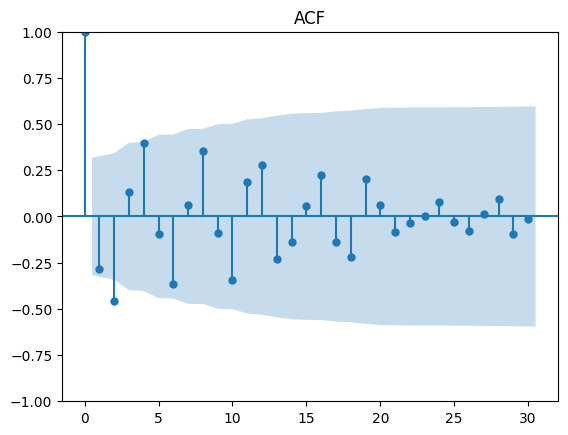

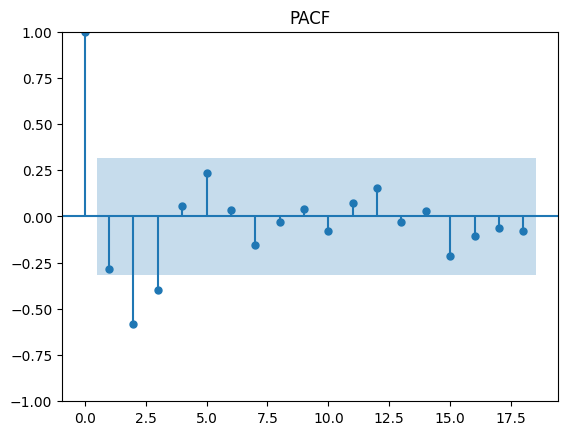

                               SARIMAX Results                                
Dep. Variable:                    ipc   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -9.314
Date:                Mon, 18 Sep 2023   AIC                             24.628
Time:                        12:54:03   BIC                             29.541
Sample:                             0   HQIC                            26.376
                                 - 39                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0467      0.380      0.123      0.902      -0.698       0.791
ma.L1         -0.5663      0.307     -1.846      0.065      -1.168       0.035
sigma2         0.0947      0.026      3.610      0.0

C:\Users\yamez\anaconda3\envs\DC_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yamez\anaconda3\envs\DC_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yamez\anaconda3\envs\DC_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


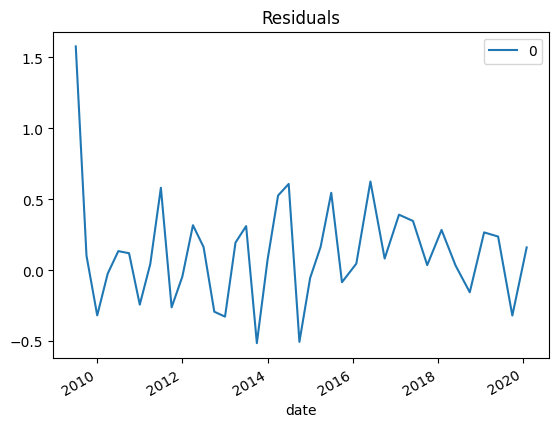

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
adf_test(mean_ipc_by_year['ipc'])

mean_ipc_by_year_diff = mean_ipc_by_year.diff().dropna()

# Re-run the ADF test to check for stationarity
adf_test(mean_ipc_by_year_diff['ipc'])

# Plot ACF and PACF to determine AR and MA orders
plot_acf(mean_ipc_by_year_diff, lags=30)
plt.title('ACF')
plt.show()

plot_pacf(mean_ipc_by_year_diff, lags=18)
plt.title('PACF')
plt.show()

# Create and fit the ARIMA model
# Replace p and q with the appropriate orders determined from the ACF and PACF plots
p = 1  # AR order
d = 1  # Differencing order
q = 1  # MA order

model = ARIMA(mean_ipc_by_year, order=(p, d, q))
results = model.fit()

# Summary of the ARIMA model
print(results.summary())

# Plot the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot(title='Residuals')
plt.show()

# Make predictions
# Replace start and end with your desired prediction period
start = '2020-02-01'
end = '2021-12-31'
forecast = results.predict(start=start, end=end, dynamic=False, typ='levels')

# Plot the observed and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(mean_ipc_by_year, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


In [8]:
mean_ipc_by_year.to_csv("DATA_GPT.csv")

                               SARIMAX Results                                
Dep. Variable:                    ipc   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -9.314
Date:                Mon, 18 Sep 2023   AIC                             24.628
Time:                        12:54:21   BIC                             29.541
Sample:                             0   HQIC                            26.376
                                 - 39                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0467      0.380      0.123      0.902      -0.698       0.791
ma.L1         -0.5663      0.307     -1.846      0.065      -1.168       0.035
sigma2         0.0947      0.026      3.610      0.0

C:\Users\yamez\anaconda3\envs\DC_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yamez\anaconda3\envs\DC_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yamez\anaconda3\envs\DC_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yamez\anaconda3\envs\DC_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `sta

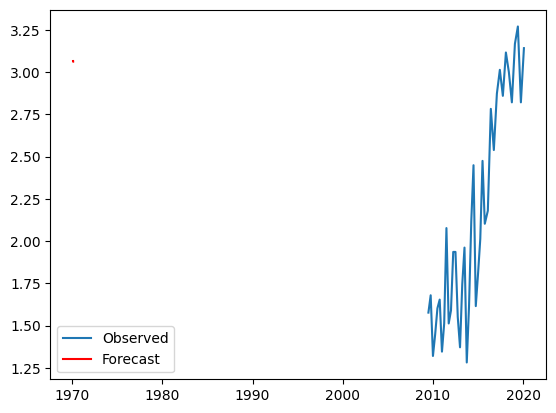

In [9]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# p, d, q are parameters for the ARIMA model
# p is the number of autoregressive terms (AR part)
# d is the number of nonseasonal differences needed for stationarity (I part)
# q is the number of lagged forecast errors (MA part)
p, d, q = 1, 1, 1
model = ARIMA(mean_ipc_by_year, order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Predictions
start_index = len(mean_ipc_by_year)
end_index = start_index + 4  # Forecast next 5 data points
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

print(f"Forecast: {forecast}")

# Plot actual vs predicted values
plt.plot(mean_ipc_by_year.index, mean_ipc_by_year['ipc'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()


In [10]:
mean_ipc_by_year

,ipc
date,
2009-07-01,1.576923
2009-10-01,1.679487
2010-01-01,1.320513
2010-04-01,1.448718
2010-07-01,1.602564
2010-10-01,1.653846
2011-01-01,1.346154
2011-04-01,1.512821
2011-07-01,2.076923


In [11]:
len(mean_ipc_by_year)

39

C:\Users\yamez\anaconda3\envs\DC_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yamez\anaconda3\envs\DC_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yamez\anaconda3\envs\DC_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yamez\anaconda3\envs\DC_3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `sta

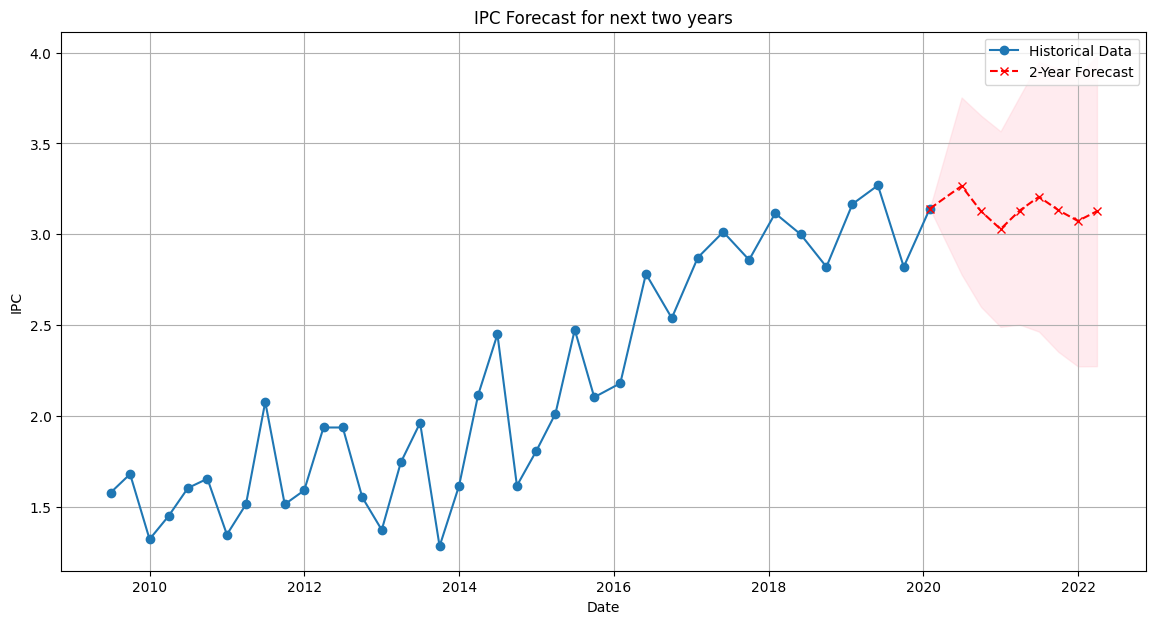

In [12]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Fit the ARIMA model
best_pdq = (2, 1, 2)  # Optimal parameters obtained earlier
model = ARIMA(mean_ipc_by_year['ipc'], order=best_pdq)
model_fit = model.fit()

# Forecast the next 8 periods
forecast_result_8 = model_fit.get_forecast(steps=8)
forecast_mean_8 = forecast_result_8.predicted_mean
conf_int_8 = forecast_result_8.conf_int()

# Create a DataFrame for the 2 year forecasted data
forecast_dates_8 = pd.date_range(mean_ipc_by_year.index[-1], periods=9, freq='Q')[1:]
forecast_df_8 = pd.DataFrame({
    'date': forecast_dates_8,
    'forecast': forecast_mean_8,
    'lower_bound': conf_int_8.iloc[:, 0],
    'upper_bound': conf_int_8.iloc[:, 1]
})
forecast_df_8.set_index('date', inplace=True)

df_latest = pd.concat([pd.DataFrame({"date": mean_ipc_by_year.index[-1],
                                     "forecast": mean_ipc_by_year.values[-1], 
                                     "lower_bound": mean_ipc_by_year.values[-1], 
                                     "upper_bound": mean_ipc_by_year.values[-1]}).set_index("date"),
                       forecast_df_8])
forecast_df_8 = df_latest

# Plot the historical and 2 year forecasted data
plt.figure(figsize=(14, 7))
plt.plot(mean_ipc_by_year.index, mean_ipc_by_year['ipc'], marker='o', linestyle='-', label='Historical Data')
plt.plot(forecast_df_8.index, forecast_df_8['forecast'], marker='x', linestyle='--', color='red', label='2-Year Forecast')
plt.fill_between(forecast_df_8.index, forecast_df_8['lower_bound'], forecast_df_8['upper_bound'], color='pink', alpha=0.3)
plt.title('IPC Forecast for next two years')
plt.xlabel('Date')
plt.ylabel('IPC')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
forecast_df_8

,forecast,lower_bound,upper_bound
date,,,
2020-02-01,3.141026,3.141026,3.141026
2020-06-30,3.265949,2.778761,3.753136
2020-09-30,3.126353,2.599517,3.653189
2020-12-31,3.028633,2.490288,3.566978
2021-03-31,3.130379,2.502609,3.758150
2021-06-30,3.206602,2.464127,3.949076
2021-09-30,3.132589,2.352419,3.912759
2021-12-31,3.073292,2.272656,3.873928
2022-03-31,3.127018,2.273528,3.980507


In [14]:
mean_ipc_by_year

,ipc
date,
2009-07-01,1.576923
2009-10-01,1.679487
2010-01-01,1.320513
2010-04-01,1.448718
2010-07-01,1.602564
2010-10-01,1.653846
2011-01-01,1.346154
2011-04-01,1.512821
2011-07-01,2.076923


# 2e assignment, explore structered data

In [16]:
df

,,country,district_code,centx,centy,year_month,year,month,ipc,ha,ndvi_mean,...,et_mean,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct
date,district,,,,,,,,,,,,,,,,,,,,,
2007-01-01,Bor,South Sudan,74,32.00486,6.465644,2007_01,2007,1,NaN,NaN,0.345851,...,0.671249,0.048880,0,0,0.561363,14008.3300,7.961984,239344.0,11393.760,90.8503
2007-02-01,Bor,South Sudan,74,32.00486,6.465644,2007_02,2007,2,NaN,NaN,0.307600,...,0.129184,-0.457928,0,0,0.565693,14008.3300,7.961984,239344.0,11393.760,90.8503
2007-03-01,Bor,South Sudan,74,32.00486,6.465644,2007_03,2007,3,NaN,NaN,0.278344,...,1.025460,-0.590175,0,0,0.592437,14008.3300,7.961984,239344.0,11393.760,90.8503
2007-04-01,Bor,South Sudan,74,32.00486,6.465644,2007_04,2007,4,NaN,NaN,0.303320,...,3.846809,-1.845536,0,0,0.605352,14008.3300,7.961984,239344.0,11393.760,90.8503
2007-05-01,Bor,South Sudan,74,32.00486,6.465644,2007_05,2007,5,NaN,NaN,0.413716,...,8.316274,-2.972735,0,0,0.618699,14008.3300,7.961984,239344.0,11393.760,90.8503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,Malakal,South Sudan,151,31.64280,9.658457,2019_10,2019,10,3.0,0.0,0.681990,...,22.853360,6.053181,1,0,82.872570,757.7855,13.068690,102228.0,7145.909,85.5000
2019-11-01,Malakal,South Sudan,151,31.64280,9.658457,2019_11,2019,11,NaN,NaN,0.556748,...,13.372410,8.745254,0,0,87.728720,757.7855,13.068690,102228.0,7145.909,85.5000
2019-12-01,Malakal,South Sudan,151,31.64280,9.658457,2019_12,2019,12,NaN,NaN,0.400063,...,3.089540,1.698060,0,0,93.566750,757.7855,13.068690,102228.0,7145.909,85.5000


In [36]:
new_df = df.loc[:,"ipc":].dropna(subset=["ipc"]).set_index("ipc").copy(deep=True)

In [39]:
new_df.dtypes

ha                 float64
ndvi_mean          float64
ndvi_anom          float64
rain_mean          float64
rain_anom          float64
et_mean            float64
et_anom            float64
count_violence       int64
sum_fatalities       int64
food_price_idx     float64
area               float64
cropland_pct       float64
pop                float64
ruggedness_mean    float64
pasture_pct        float64
dtype: object

In [40]:
new_df

,ha,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_mean,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct
ipc,,,,,,,,,,,,,,,
2.0,NaN,0.515550,82.73602,13.686190,-9.698671,14.027670,-7.561892,0,0,1.098674,14008.3300,7.961984,256618.0,11393.760,90.8503
2.0,NaN,0.606967,100.22870,11.130940,-6.215118,18.347970,-0.177359,1,7,1.185251,14008.3300,7.961984,256618.0,11393.760,90.8503
1.0,NaN,0.253501,83.79816,0.293134,-0.068916,0.167976,-0.454393,0,0,1.238529,14008.3300,7.961984,265263.0,11393.760,90.8503
2.0,NaN,0.227561,76.68565,7.614567,-5.549418,1.413454,-4.222910,0,0,1.292882,14008.3300,7.961984,265263.0,11393.760,90.8503
2.0,NaN,0.592324,95.05682,32.513120,9.128263,19.934490,-1.655068,0,0,1.251864,14008.3300,7.961984,265263.0,11393.760,90.8503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.0,1.0,0.658442,109.45600,12.046950,-0.286235,15.575860,-1.224320,0,0,53.934660,757.7855,13.068690,118402.0,7145.909,85.5000
3.0,0.0,0.245634,99.63349,0.048424,0.001775,0.239924,0.031929,0,0,60.114030,757.7855,13.068690,102228.0,7145.909,85.5000
3.0,1.0,0.539870,114.87210,28.827110,9.613820,10.996420,1.992628,0,0,69.429000,757.7855,13.068690,102228.0,7145.909,85.5000


In [42]:
new_df.isna().sum()

ha                 858
ndvi_mean            0
ndvi_anom            0
rain_mean            0
rain_anom            0
et_mean              0
et_anom              0
count_violence       0
sum_fatalities       0
food_price_idx       0
area                 0
cropland_pct         0
pop                  0
ruggedness_mean      0
pasture_pct          0
dtype: int64

variable `ha` is binary: 0 or 1 <br>
variables `count_violence` and `sum_fatalities` are discrete <br>
all other variables are continuos <br> <br>
variable `ha` has 858 missing values (and 2184 present) (maybe we can find replacement values nearby) <br>
all other variables have 0 missing values (and 3042 present)

In [47]:
# drop `ha` for now
new_df.drop(columns=["ha"], inplace=True)

In [61]:
pre_corr_df = new_df.reset_index().T

In [67]:
corr_df = pd.DataFrame(np.corrcoef(pre_corr_df), pre_corr_df.index, pre_corr_df.index)

<Axes: >

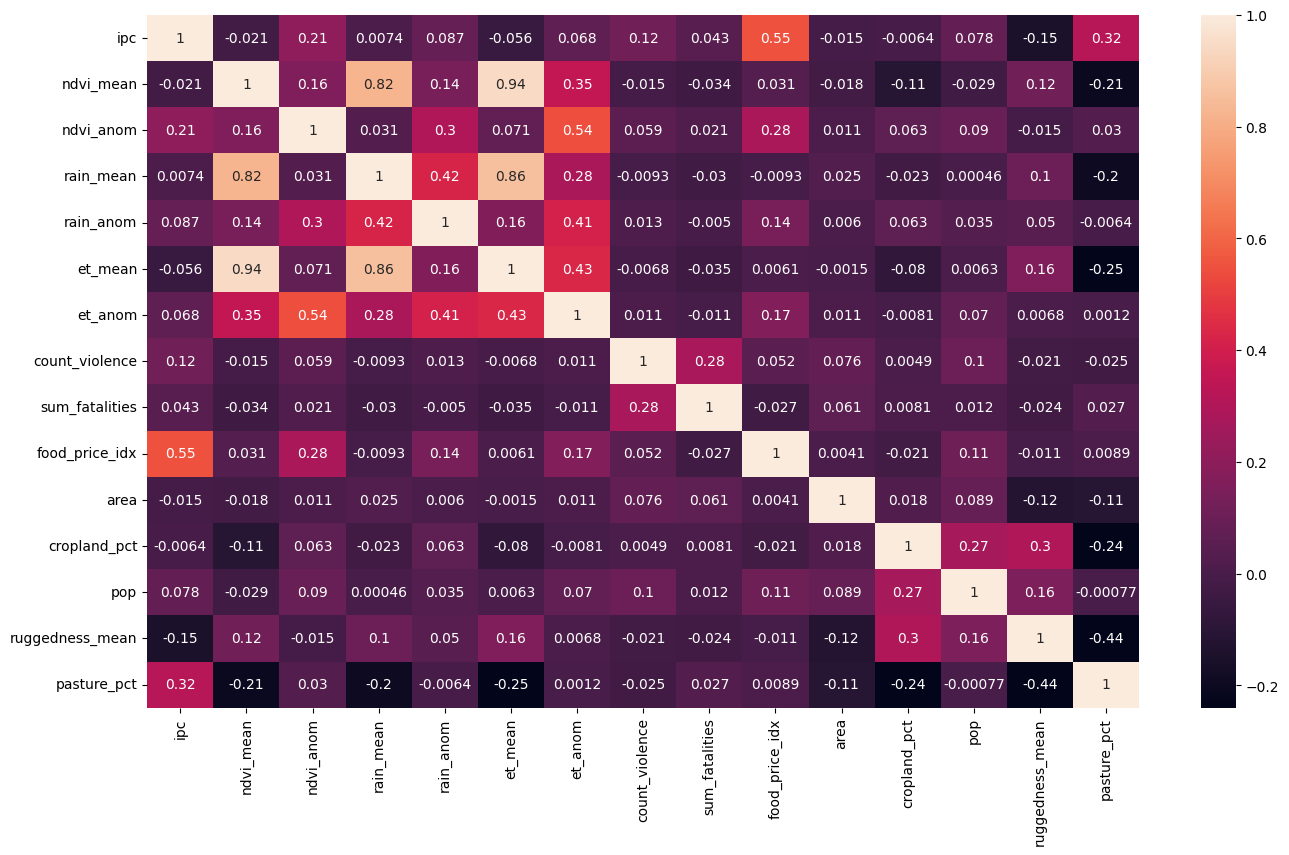

In [79]:
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(corr_df, annot=True, ax=ax, robust=True)

In [82]:
# remove et_mean because of colinearity
new_df.drop(columns=["et_mean"], inplace=True)

In [84]:
new_df

,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct
ipc,,,,,,,,,,,,,
2.0,0.515550,82.73602,13.686190,-9.698671,-7.561892,0,0,1.098674,14008.3300,7.961984,256618.0,11393.760,90.8503
2.0,0.606967,100.22870,11.130940,-6.215118,-0.177359,1,7,1.185251,14008.3300,7.961984,256618.0,11393.760,90.8503
1.0,0.253501,83.79816,0.293134,-0.068916,-0.454393,0,0,1.238529,14008.3300,7.961984,265263.0,11393.760,90.8503
2.0,0.227561,76.68565,7.614567,-5.549418,-4.222910,0,0,1.292882,14008.3300,7.961984,265263.0,11393.760,90.8503
2.0,0.592324,95.05682,32.513120,9.128263,-1.655068,0,0,1.251864,14008.3300,7.961984,265263.0,11393.760,90.8503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.0,0.658442,109.45600,12.046950,-0.286235,-1.224320,0,0,53.934660,757.7855,13.068690,118402.0,7145.909,85.5000
3.0,0.245634,99.63349,0.048424,0.001775,0.031929,0,0,60.114030,757.7855,13.068690,102228.0,7145.909,85.5000
3.0,0.539870,114.87210,28.827110,9.613820,1.992628,0,0,69.429000,757.7855,13.068690,102228.0,7145.909,85.5000


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [86]:
new_df = new_df.reset_index()

In [87]:
X = new_df.drop('ipc', axis=1)  # Predictor variables (Drop 'ipc' column)
y = new_df['ipc']  # Target variable ('ipc' column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = model.predict(X_test)

In [91]:
MSE = mean_squared_error(y_test, y_pred)
MSE

0.47058743224090094

In [102]:
X_test["food_price_idx"].tolist()

[3.855443,
 2.006884,
 2.038718,
 15.51376,
 1.903746,
 2.265435,
 2.093064,
 2.155709,
 1.190217,
 3.876873,
 32.67491,
 46.36897,
 2.2609,
 3.414949,
 1.229723,
 51.64633,
 2.134514,
 79.72531,
 1.164564,
 2.16973,
 1.968425,
 5.075739,
 2.043488,
 2.166776,
 2.180678,
 65.22728,
 25.84979,
 70.21602,
 1.158342,
 1.840154,
 98.48935,
 1.804478,
 66.08532,
 7.266595,
 31.36418,
 2.31551,
 37.04982,
 14.76562,
 1.748992,
 79.46993,
 1.138359,
 1.986176,
 19.84027,
 28.7995,
 2.144755,
 1.987366,
 3.731657,
 2.405341,
 1.077955,
 3.819831,
 0.9448054,
 2.282204,
 5.071184,
 56.36167,
 7.563678,
 32.22388,
 2.106621,
 0.9382362,
 2.4379,
 1.071169,
 2.102199,
 47.83827,
 2.593601,
 2.187328,
 3.348792,
 2.15814,
 6.068186,
 22.47698,
 2.137245,
 22.48937,
 36.01666,
 0.9031049,
 1.850225,
 64.56498,
 14.67645,
 79.50888,
 1.969491,
 2.362274,
 2.07419,
 1.130783,
 70.66148,
 6.739828,
 2.175299,
 2.09046,
 2.212137,
 0.9655987,
 2.246007,
 9.210384,
 1.608577,
 2.185534,
 1.153182,
 2.31

In [97]:
y_test

298     1.0
2791    1.0
139     1.0
535     2.0
945     2.0
       ... 
2727    3.0
2401    2.0
498     2.0
2104    3.0
210     1.0
Name: ipc, Length: 609, dtype: float64

In [112]:
df_pred = pd.DataFrame([X_test["food_price_idx"].tolist(), y_test.tolist(), y_pred.tolist()], index=["X", "y_real", "y_pred"]).T.set_index("X").sort_index()

<Axes: xlabel='X'>

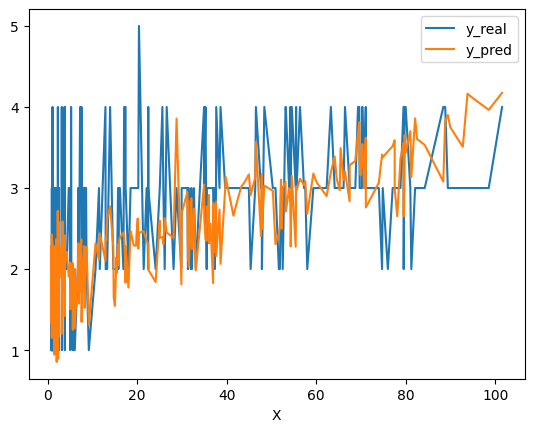

In [115]:
df_pred.plot()

In [141]:
df_pred

,y_real,y_pred
X,,
0.798678,1.0,2.164386
0.822372,1.0,2.174183
0.834942,1.0,2.260341
0.884821,1.0,1.984594
0.903080,2.0,1.965443
...,...,...
92.708230,3.0,3.508057
93.758560,3.0,4.164124
94.439700,3.0,4.131012


In [129]:
test_df = df.loc[:,"ipc":].dropna(subset=["ipc"]).copy(deep=True)

In [137]:
test_df

,,ipc,ha,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_mean,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct
date,district,,,,,,,,,,,,,,,,
2009-07-01,Bor,2.0,NaN,0.515550,82.73602,13.686190,-9.698671,14.027670,-7.561892,0,0,1.098674,14008.3300,7.961984,256618.0,11393.760,90.8503
2009-10-01,Bor,2.0,NaN,0.606967,100.22870,11.130940,-6.215118,18.347970,-0.177359,1,7,1.185251,14008.3300,7.961984,256618.0,11393.760,90.8503
2010-01-01,Bor,1.0,NaN,0.253501,83.79816,0.293134,-0.068916,0.167976,-0.454393,0,0,1.238529,14008.3300,7.961984,265263.0,11393.760,90.8503
2010-04-01,Bor,2.0,NaN,0.227561,76.68565,7.614567,-5.549418,1.413454,-4.222910,0,0,1.292882,14008.3300,7.961984,265263.0,11393.760,90.8503
2010-07-01,Bor,2.0,NaN,0.592324,95.05682,32.513120,9.128263,19.934490,-1.655068,0,0,1.251864,14008.3300,7.961984,265263.0,11393.760,90.8503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01,Malakal,3.0,1.0,0.658442,109.45600,12.046950,-0.286235,15.575860,-1.224320,0,0,53.934660,757.7855,13.068690,118402.0,7145.909,85.5000
2019-02-01,Malakal,3.0,0.0,0.245634,99.63349,0.048424,0.001775,0.239924,0.031929,0,0,60.114030,757.7855,13.068690,102228.0,7145.909,85.5000
2019-06-01,Malakal,3.0,1.0,0.539870,114.87210,28.827110,9.613820,10.996420,1.992628,0,0,69.429000,757.7855,13.068690,102228.0,7145.909,85.5000
